In [13]:
from pyrcn.base.blocks import NodeToNode
from pyrcn.base.blocks import InputToNode
from sklearn.datasets import make_blobs


# Generate a toy dataset
U, y = make_blobs(n_samples=100, n_features=10)

In [14]:
#      _ _ _ _ _ _ _ _
#     |               |
# ----| Input-to-Node |------
# u[n]|_ _ _ _ _ _ _ _|r'[n]
# U                    R_i2n

input_to_node = InputToNode(hidden_layer_size=50,
                            k_in=5, input_activation="tanh",
                            input_scaling=1.0, bias_scaling=0.1)

In [15]:
%%time

R_i2n = input_to_node.fit_transform(U)
print(U.shape, R_i2n.shape)

(100, 10) (100, 50)
CPU times: user 3.58 ms, sys: 0 ns, total: 3.58 ms
Wall time: 48.4 ms


In [16]:
#      _ _ _ _ _ _ _ _        _ _ _ _ _ _ _
#     |               |      |              |
# ----| Input-to-Node |------| Node-to-Node |------
# u[n]|_ _ _ _ _ _ _ _|r'[n] |_ _ _ _ _ _ _ |r[n]
# U                    R_i2n                 R_n2n

# Initialize, fit and apply NodeToNode
node_to_node = NodeToNode(hidden_layer_size=50,
                          reservoir_activation="tanh",
                          spectral_radius=1.0, leakage=0.9,
                          bidirectional=False)

In [17]:

R_n2n = node_to_node.fit_transform(R_i2n)
print(U.shape, R_n2n.shape)

(100, 10) (100, 50)


In [20]:
from sklearn.linear_model import Ridge

In [21]:
#       _ _ _ _ _ _ _       _ _ _ _ _ _ _        _ _ _ _ _ _ _        
#     |              |     |             |     |               |       
# ----|Input-to-Node |-----|Node-to-Node |-----|Node-to-Output |
# u[n]| _ _ _ _ _ _ _|r'[n]|_ _ _ _ _ _ _|r[n] | _ _ _ _ _ _ _ |
# U                   R_i2n               R_n2n        |
#                                                      |
#                                                 y[n] | y_pred

# Initialize, fit and apply NodeToOutput
y_pred = Ridge().fit(R_n2n, y).predict(R_n2n)
print(y_pred.shape)

(100,)


In [22]:
from sklearn.linear_model import Ridge as skRidge
from pyrcn.echo_state_network import ESNRegressor
from pyrcn.extreme_learning_machine import ELMRegressor
from pyrcn.datasets import mackey_glass

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [23]:
# Load the dataset
X, y = mackey_glass(n_timesteps=5000)
# Define Train/Test lengths
trainLen = 1900
X_train, y_train = X[:trainLen], y[:trainLen]
X_test, y_test = X[trainLen:], y[trainLen:]

# Initialize and train an ELMRegressor and an ESNRegressor
esn = ESNRegressor().fit(X=X_train.reshape(-1, 1), y=y_train)
elm = ELMRegressor(regressor=skRidge()).fit(X=X_train.reshape(-1, 1), y=y_train)

print("Fitted models")

Fitted models


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot: >

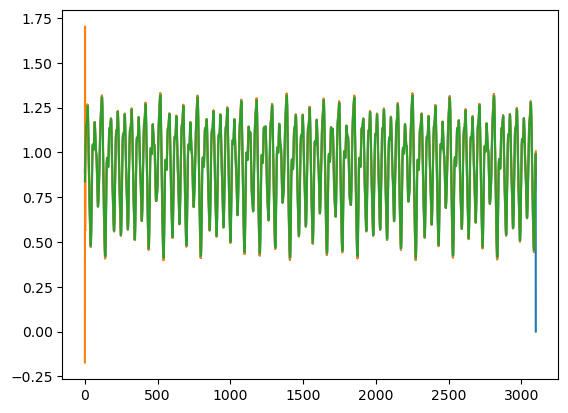

In [25]:
fig, axs = plt.subplots()

sns.lineplot(x=list(range(len(y_test))), y=y_test, ax=axs)
sns.lineplot(x=list(range(len(y_test))), y=esn.predict(X_test.reshape(-1, 1)), ax=axs)
sns.lineplot(x=list(range(len(y_test))), y=elm.predict(X_test.reshape(-1, 1)), ax=axs)